# ATTACK DOUBLE SPENDING

#### 1) Importation des librairies et creation de fonction 

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def AouB(proba):
    Block=np.random.choice(('A','B'),p=[proba,1-proba])
    return Block


def Simulation(avance,proba):
    R=0
    H=0
    M=0
    #Tentative 0
    Tentative=AouB(proba)
    if Tentative =='B':
        return 0,1,-1
    #Tentative pour la suite
    else:
        avance+=1
        while avance !=1:
            Tentative=AouB(proba)
            if Tentative =='A':
                avance+=1
                R+=1
                H+=1
                M+=1
            else:
                avance-=1
        return R,H,M

def Résultat(nombre=5,avance=1,proba=0.33):
    ER=0
    EH=0
    Miner=[]
    for i in range(nombre):
        R,H,M = Simulation(avance,proba)
        Miner.append(M)
        ER+=R
        EH+=H
    return ER,EH,Miner

def Rendement(ER,EH,proba):
    R_exp=ER/EH
    #R_theo=er/(p+er*(p*q))
    return R_exp

#### 2) Paramétrage

In [31]:
#Paramètres
nombre=5000
avance=1
L_proba=np.arange(0.01,0.50,0.01)
#Values
ER=[]
EH=[]
Miner=[]
#Rendement
L_Rdt_Exp=[]
L_Rdt_theo=[]
for i in L_proba:
    er,eh,M = Résultat(nombre,avance,i)
    ER.append(er)
    EH.append(eh)
    Miner.append(M)
    R_Exp = Rendement(er,eh,i)
    L_Rdt_Exp.append(R_Exp)
    #L_Rdt_theo.append(R_theo)

#### 3) Seuil de Rentabilité

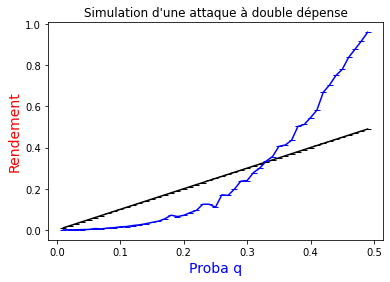

In [32]:
fig,ax=plt.subplots()
plt.title('Simulation d\'une attaque à double dépense')
ax.plot(L_proba,L_proba,marker="_",color='black')
ax.plot(L_proba,L_Rdt_Exp,marker="_",color='blue')
#ax.plot(L_proba,L_Rdt_theo,marker="_",color='red')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Rendement",color="red",fontsize=14)
idxExp = np.argwhere(np.diff(np.sign(L_proba - L_Rdt_Exp))).flatten() #index intersection Exp
#idxTheo = np.argwhere(np.diff(np.sign(L_proba - L_Rdt_theo))).flatten() #index intersection Theo
plt.show()

In [33]:
print("Valeur min de Rentabilité =>",0.33)
print("Valeur min de Rdt Expérimental => ",L_proba[idxExp[0]])
#print("Valeur min de Rdt Théorique => ",L_proba[idxTheo[0]])


Valeur min de Rentabilité => 0.33
Valeur min de Rdt Expérimental =>  0.32


#### 4) Avantage

In [34]:
def BlockTeam(M):
    TeamA=0
    TeamB=0
    for i in M:
        if i>0:
            TeamA+=i
        else:
            TeamB+=abs(i)
    return TeamA,TeamB

In [35]:
TeamA=[]
TeamB=[]
for M in Miner:
    TA,TB = BlockTeam(M)
    TeamA.append(TA)
    TeamB.append(TB)

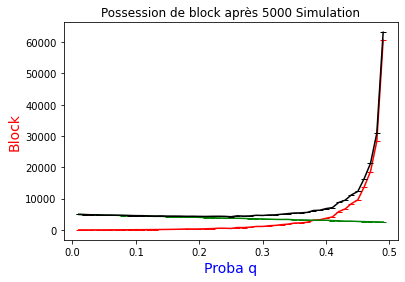

In [36]:
fig,ax=plt.subplots()
plt.title('Possession de block après '+str(nombre)+' Simulation')
ax.plot(L_proba,TeamA,marker="_",color='red')
ax.plot(L_proba,TeamB,marker="_",color='green')
ax.plot(L_proba,EH,marker="_",color='black')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Block",color="red",fontsize=14)

plt.show()

In [37]:
RatioBlockA=[]
RatioBlockB=[]
for index in range(len(EH)):
    RatioBlockA.append(TeamA[index]/EH[index])
    RatioBlockB.append(TeamB[index]/EH[index])

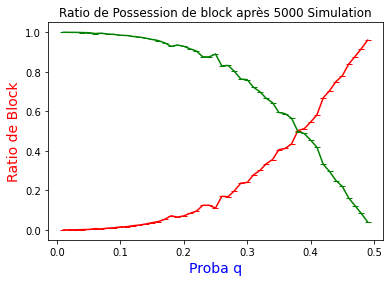

In [38]:
fig,ax=plt.subplots()
plt.title('Ratio de Possession de block après '+str(nombre)+' Simulation')
ax.plot(L_proba,RatioBlockA,marker="_",color='red')
ax.plot(L_proba,RatioBlockB,marker="_",color='green')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Block",color="red",fontsize=14)

plt.show()

In [39]:
RewardParSimulationA=[]
for index in range(len(ER)):
    RewardParSimulationA.append(ER[index]/nombre)

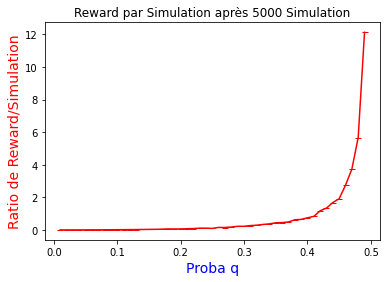

In [40]:
fig,ax=plt.subplots()
plt.title('Reward par Simulation après '+str(nombre)+' Simulation')
ax.plot(L_proba,RewardParSimulationA,marker="_",color='red')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Reward/Simulation",color="red",fontsize=14)

plt.show()